## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
# Start solution here

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor 
from matplotlib import pyplot
from sklearn import tree

This is a classic dataset that contains the prices and other attributes of almost 54,000 diamonds. There are 9 attributes that might have relation with the price of the diamond. I will explore the dataset and try to build some predictive models to predict the price of the diamond. 

Here are the dependent variable and the features. 

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [ ]:
# First read the data into dataframe and check the structure of the data

csv=pd.read_csv("diamonds.csv")
df = pd.DataFrame(csv)
df.info()
df

#We can tell that there are 10 variables, inculding int, float, and characters. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#Drop the first column since it is not useful
df = df.iloc[: , 1:]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


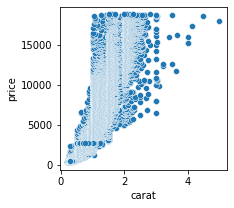

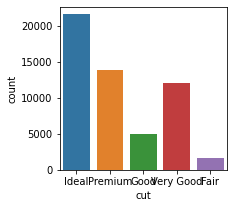

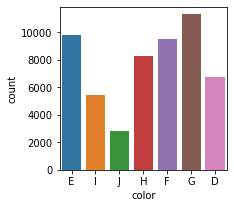

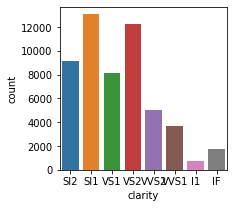

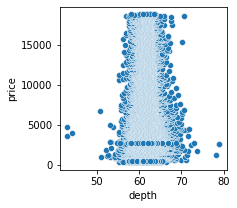

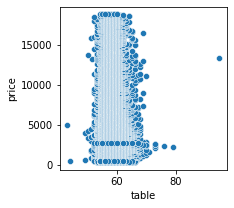

<Figure size 216x216 with 0 Axes>

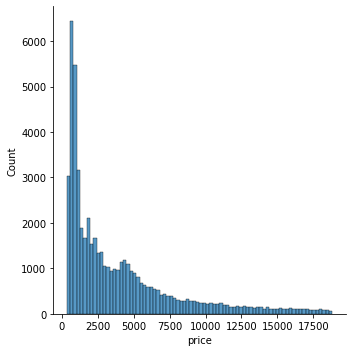

In [ ]:
#Explore the dataset and see how each features perform


plt.figure(1)
sn.scatterplot(x = df.carat, y= df.price)
# The carat and the price has shown a positive linear relationship 
# As carat increases, the price will increase.  

plt.figure(2)
sn.countplot(x = "cut",data = df)

plt.figure(3)
sn.countplot(x = "color",data = df)

plt.figure(4)
sn.countplot(x = "clarity",data = df)
#The countplots show that the cut,the color and the clarity of diamonds are not evenly distrbuted 



plt.figure(5)
sn.scatterplot(x = df.depth, y= df.price)


plt.figure(6)
sn.scatterplot(x = df.table, y= df.price)
#The two scatter plots shows that the depth and table of the diamonds don't show da clear relation with the price.
#They seem to be normally distributed. 


plt.figure(7)
sn.displot( x="price", data = df)



In [ ]:
# The target variable is the price of diamond, and the other 9 variables are related features.
#Since price is not a classification variable, I will first use regression model to predict the price

target = df['price']
feature = df.drop(['price'],axis=1)
feature.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [ ]:
#First,make all the features into dummy variables

df2 = pd.get_dummies(feature)


df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   x              53940 non-null  float64
 4   y              53940 non-null  float64
 5   z              53940 non-null  float64
 6   cut_Fair       53940 non-null  uint8  
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_D        53940 non-null  uint8  
 12  color_E        53940 non-null  uint8  
 13  color_F        53940 non-null  uint8  
 14  color_G        53940 non-null  uint8  
 15  color_H        53940 non-null  uint8  
 16  color_I        53940 non-null  uint8  
 17  color_J        53940 non-null  uint8  
 18  clarit

In [ ]:
#Then split the data into training and testing dataset (70% training, 30% testing)
X = df2

y = target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2020)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(37758, 26)
(37758,)
(16182, 26)
(16182,)


In [ ]:
#Make a linear regression model

LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

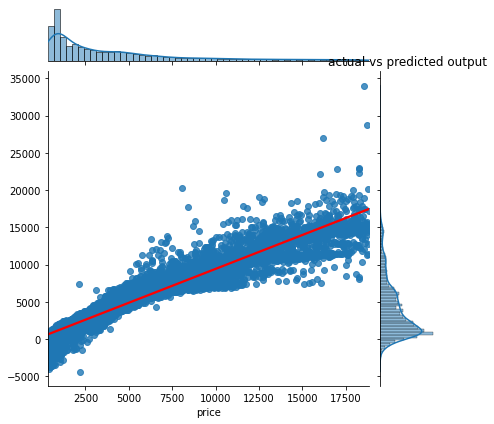

In [ ]:
LR_pred = LR.predict(X_test)
# Here we make a plot to see how the linear regression line performs
sn.jointplot(x=y_test,y=LR_pred,kind='reg',line_kws={"color": "red"})
plt.title('actual vs predicted output')
plt.show()


In [ ]:
# Now calculate the accuracy of the model
#Since accuracy_score is not useful in this model, I will use R2.

r2LR = r2_score(y_test, LR_pred)

print("R2 Score: ",r2LR)

LR_pred_train = LR.predict(X_train)
LR_train_rmse = np.sqrt(mean_squared_error(y_train,LR_pred_train))

print("Train RMSE: %f" % (LR_train_rmse))


LR_test_rmse = np.sqrt(mean_squared_error(y_test,LR_pred))

print("LR Test RMSE: %f" % (LR_test_rmse))
#The R2 score is 0.9199049342058386, which is pretty good
#But the RMSE is 1141.638, which means the model has a high variance on the residuals
# The model is not overfit with the training and test RMSE results.

R2 Score:  0.9199049342058386
Train RMSE: 1125.202780
LR Test RMSE: 1141.638240


In [ ]:
# Another model I'll use is the decision tree regression model

dt = DecisionTreeRegressor(random_state = 0) 
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

R2 Score:  0.9645031071174093
Train RMSE: 9.121133
dt Test RMSE: 760.012607


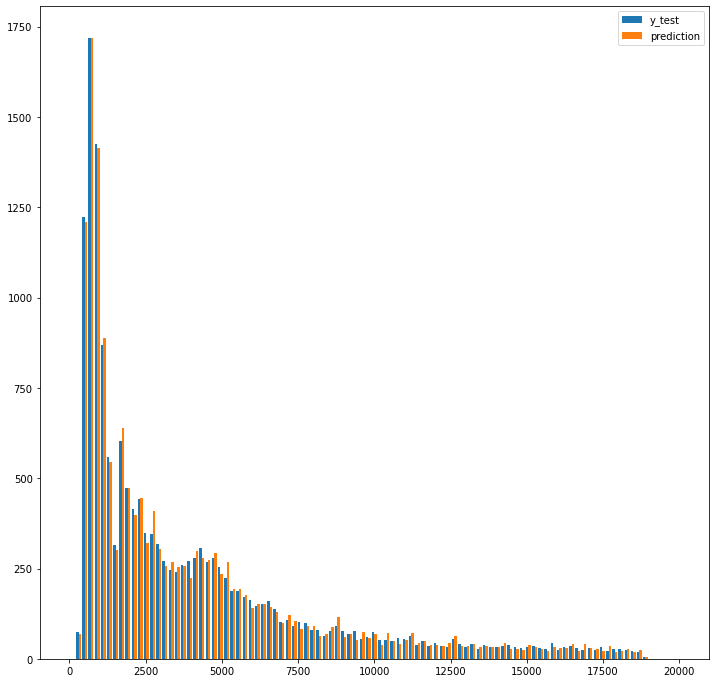

In [ ]:
#Check the R2 score and visualize the result
dt_pred = dt.predict(X_test)

r2dt = r2_score(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
print("R2 Score: ",r2dt)

dt_pred_train = dt.predict(X_train)
dt_train_rmse = np.sqrt(mean_squared_error(y_train,dt_pred_train))

print("Train RMSE: %f" % (dt_train_rmse))

print("dt Test RMSE: %f" % (dt_rmse))
#The R2 score is 0.964503107117409, better than the linear regression. 
#The test RMSE is 760.012607,but the training RMSE is 9.12, which means the model might be overfitting

bins = np.linspace(0, 20000, 100)
plt.figure(figsize=(12,12))
plt.hist([y_test, dt_pred], bins, label=['y_test', 'prediction'])
plt.legend(loc='upper right')
plt.show()
#The plot of two histograms show that the prediction results are highly accurate with the test data. 


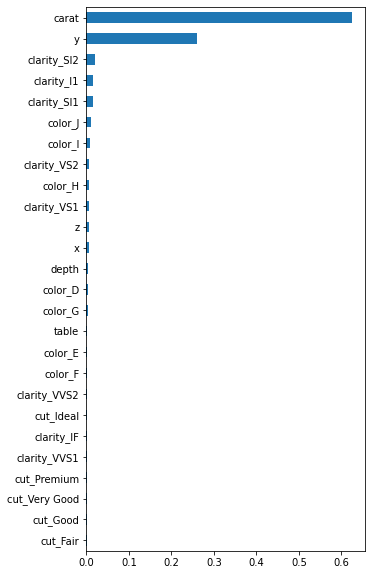

In [ ]:
#Visualize the importance of the features
importance=dt.feature_importances_
series=pd.Series(importance,index=X_train.columns)
plt.figure(figsize = (5,10))
series.sort_values(ascending=True).plot(kind='barh')
plt.show()

#It is shown that carat, y, and clarity_SI2 are the top three important features that determine the price

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


R2 Score:  0.9416855983318279
Train RMSE: 963.019408
dt Test RMSE: 974.122418


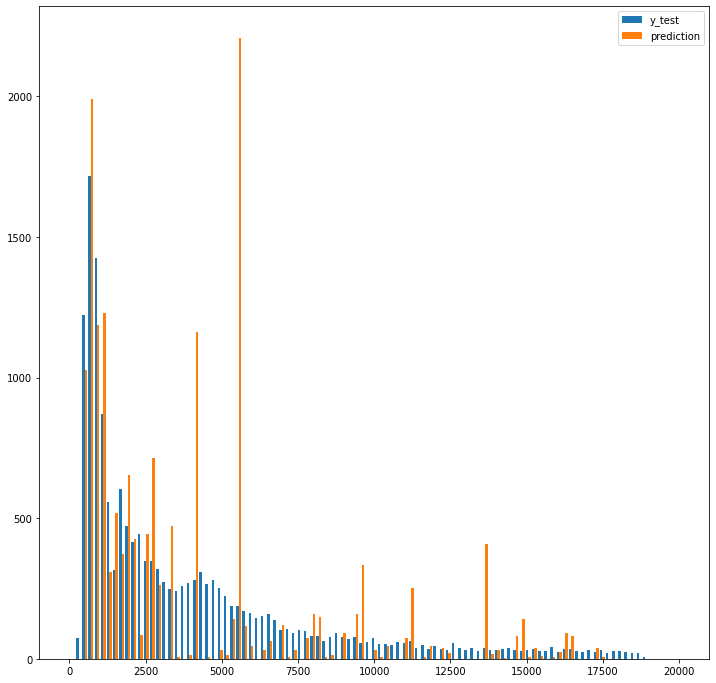

In [ ]:
#To avoid overfitting in the decision tree model, I add certain prunning steps to build a new tree

dt2  = DecisionTreeRegressor(max_depth=8,
            max_features=None, max_leaf_nodes=100, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

dt2.fit(X_train,y_train)

#Check the R2 score and visualize the result
dt2_pred = dt2.predict(X_test)

r2dt2 = r2_score(y_test, dt2_pred)
dt2_rmse = np.sqrt(mean_squared_error(y_test,dt2_pred))
print("R2 Score: ",r2dt2)

dt2_pred_train = dt2.predict(X_train)
dt2_train_rmse = np.sqrt(mean_squared_error(y_train,dt2_pred_train))

print("Train RMSE: %f" % (dt2_train_rmse))

print("dt Test RMSE: %f" % (dt2_rmse))
#The R2 score is 0.942, lower than the previous dt. 
#The test and train RMSE is similar but bigger, which means the model is not overfitting but the variance in residuals are bigger now

bins = np.linspace(0, 20000, 100)
plt.figure(figsize=(12,12))
plt.hist([y_test, dt2_pred], bins, label=['y_test', 'prediction'])
plt.legend(loc='upper right')
plt.show()



In [ ]:
#Lastly, I would use XGBoost as the final model

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)


xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


xg_reg.fit(X_train1,y_train1)

xg_pred = xg_reg.predict(X_test1)





(37758, 26)
(37758,)
(16182, 26)
(16182,)
[06:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#The R2 score and train and test RMSE 

xg_pred_train = xg_reg.predict(X_train1)
xg_train_rmse = np.sqrt(mean_squared_error(y_train1,xg_pred_train))

print("Train RMSE: %f" % (xg_train_rmse))


xg_test_rmse = np.sqrt(mean_squared_error(y_test1,xg_pred))

print("LR Test RMSE: %f" % (xg_test_rmse))


r2xg = r2_score(y_test1, xg_pred)

print("R2 Score: ",r2xg)

#The train and test RMSE are similar to each other, which means the model is good and not overfitting

Train RMSE: 600.426150
LR Test RMSE: 632.293968
R2 Score:  0.9749745038732794


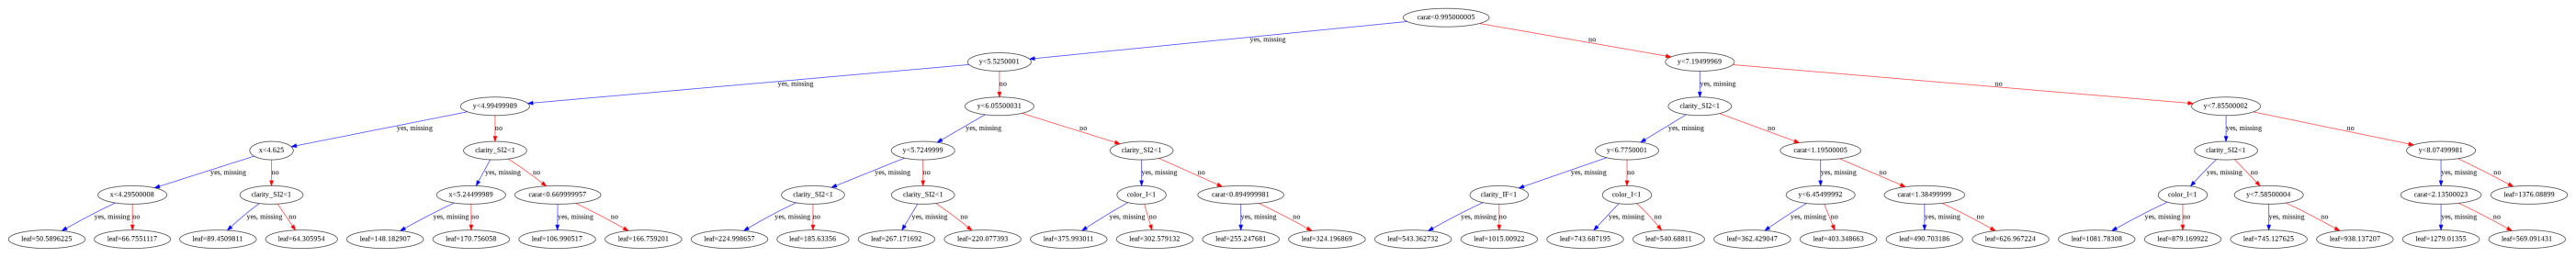

In [ ]:
#Visualize the boost tree

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [50, 25]
plt.show()

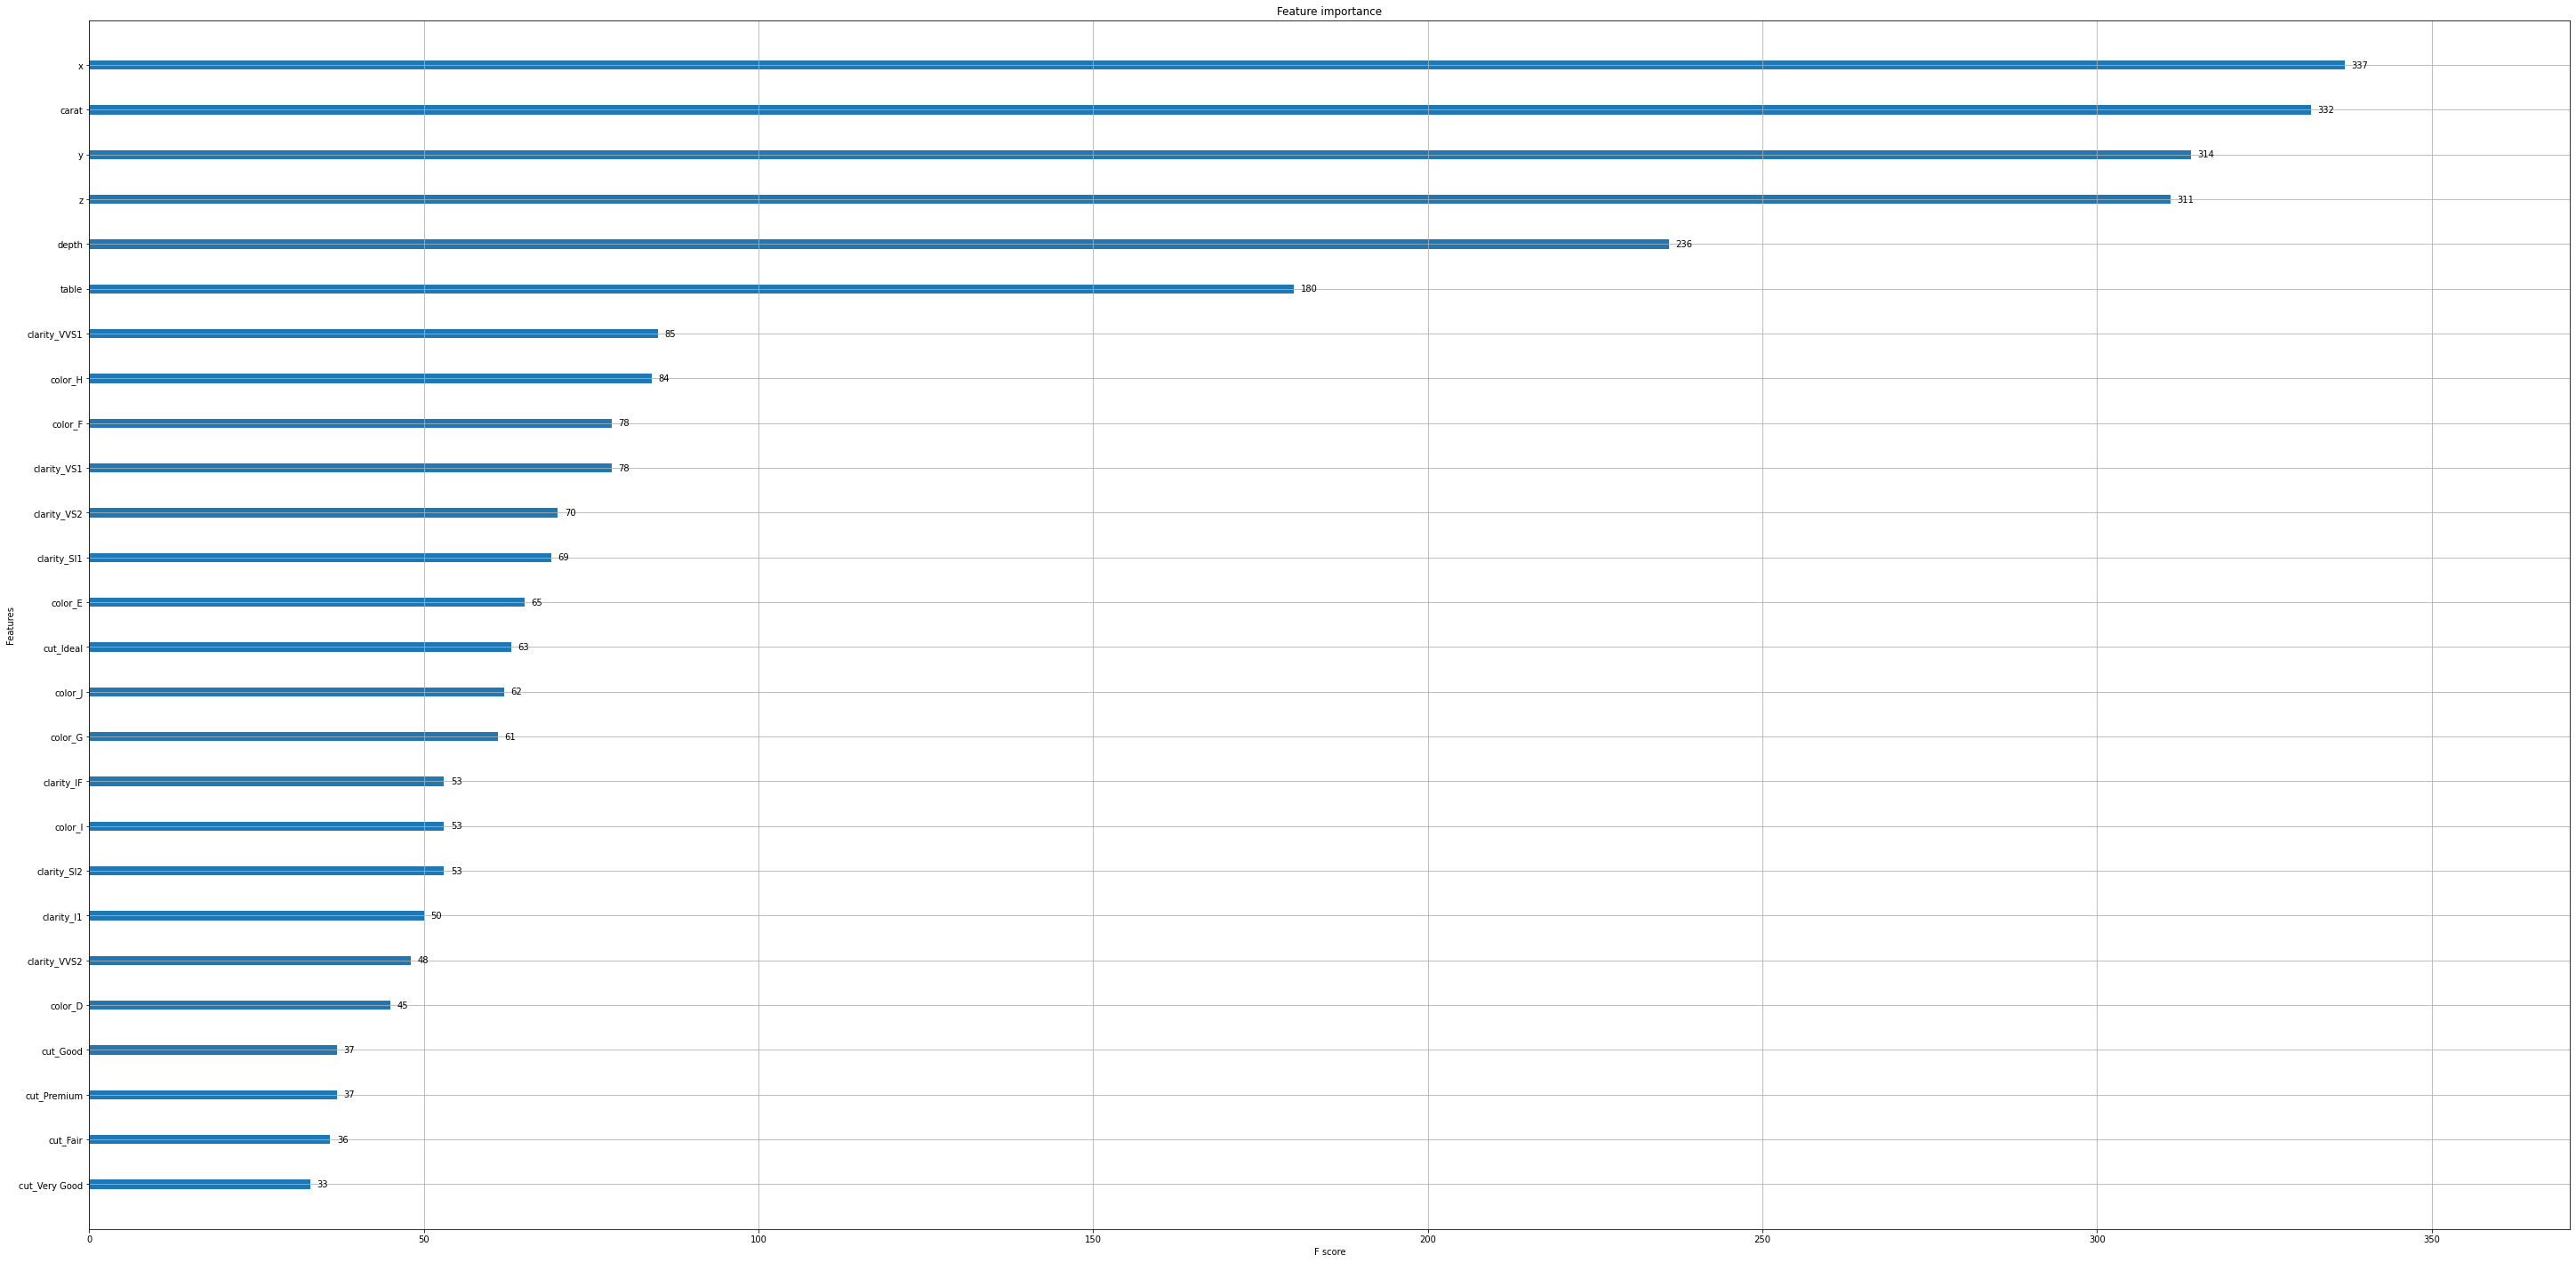

In [ ]:
#Examine the importance of the features
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [3, 3]
plt.show()
#It is shown that x,carat,and y are the top three important features that determine the price

In conclusion, the XGBoost model is the best model among the three. 